# Project - Group 15
Jennifer, Irene, Zac, Yi <br>
Stat 159

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Data

### Import Datasets

#### ToDo: Add descriptions for dataset source

In [3]:
# Opioid Overdose Deaths
opioid = pd.read_csv('data/Multiple Cause of Death 1999-2014 v1.1.csv')
opioid

,State,Year,Deaths,Population,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval,Prescriptions Dispensed by US Retailers in that year (millions)
0,Alabama,1999,39,4430141,0.9,0.6,1.2,116
1,Alabama,2000,46,4447100,1,0.8,1.4,126
2,Alabama,2001,67,4467634,1.5,1.2,1.9,138
3,Alabama,2002,75,4480089,1.7,1.3,2.1,142
4,Alabama,2003,54,4503491,1.2,0.9,1.6,149
...,...,...,...,...,...,...,...,...
811,Wyoming,2010,49,563626,8.7,6.4,11.5,210
812,Wyoming,2011,47,568158,8.3,6.1,11,219
813,Wyoming,2012,47,576412,8.2,6,10.8,217
814,Wyoming,2013,52,582658,8.9,6.7,11.7,207


In [4]:
# gdp 2010-2022
gdp = pd.read_csv('data/2010 to 2022 Gross Domestic Product_ All Industry Total by State (Millions of Dollars).csv')
gdp = gdp.reset_index()
gdp.columns = gdp.iloc[0]
gdp = gdp.tail(-1).reset_index(drop=True).iloc[:,0:8]
gdp.rename(columns={'Region Name':'State','2010-01-01': '2010', '2011-01-01': '2011','2012-01-01': '2012', '2013-01-01': '2013', '2014-01-01': '2014'}, inplace=True)

### Data Cleaning & Preprocessing
#### Opioid Data

In [5]:
# drop rows with suppressed, unreliable, or na values
opioid = opioid[opioid['Deaths']!='Suppressed']
opioid = opioid[opioid['Crude Rate']!='Unreliable']
opioid = opioid.dropna()

##### ToDo: may turn this cell into reproducible tools

In [6]:
# convert quantitative data to numeric data type
opioid['Deaths'] = pd.to_numeric(opioid['Deaths'])
opioid['Crude Rate'] = pd.to_numeric(opioid['Crude Rate'])

In [7]:
# select opioid data within 2010-2014 (range of gdp data)
opioid_range = opioid[(opioid['Year']<=2014) & (opioid['Year']>=2010)]

# group data by year and state; there's only 
opioid_annual = opioid_range.groupby(['Year', 'State'],as_index=False).mean()

/tmp/ipykernel_9094/2096028377.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  opioid_annual = opioid_range.groupby(['Year', 'State'],as_index=False).mean()


#### GDP Data

In [8]:
# rearrange gdp dataframe so can merge with opioid df
# repeat region rows for each year (5 times)
region_info = gdp.iloc[:,0:3] 
region_info = region_info.loc[np.repeat(region_info.index, 5)].reset_index(drop=True)
# change gdp columns to rows
years_gdp = gdp.iloc[:,3:8]
years_gdp_arr = ([])
for i in range(51):
    years_gdp_arr = np.append(years_gdp_arr,years_gdp.iloc[i,:].to_numpy())
years_gdp=pd.DataFrame(years_gdp_arr, columns =['GDP_0101'])
years=pd.DataFrame([2010,2011,2012,2013,2014]*51,columns =['Year'])
# concatenate into new dataframe
gdp_annual=pd.concat([years,region_info,years_gdp], axis=1, join='inner')

### Merging Dataframes
#### Note: reduced to 251 rows bc don't have opioid data for every state for each year

In [9]:
# merge datasets by year and state
gdp_opioid = pd.merge(gdp_annual, opioid_annual, on=['Year','State'])
gdp_opioid

,Year,Series ID,State,Region Code,GDP_0101,Deaths,Population,Crude Rate,Prescriptions Dispensed by US Retailers in that year (millions)
0,2010,ALNQGSP,Alabama,01,177249.15,194.0,4779736.0,4.1,210.0
1,2011,ALNQGSP,Alabama,01,183916.625,180.0,4802740.0,3.7,219.0
2,2012,ALNQGSP,Alabama,01,189245.525,175.0,4822023.0,3.6,217.0
3,2013,ALNQGSP,Alabama,01,194786.925,175.0,4833722.0,3.6,207.0
4,2014,ALNQGSP,Alabama,01,197406.85,282.0,4849377.0,5.8,196.0
...,...,...,...,...,...,...,...,...,...
246,2010,WYNQGSP,Wyoming,56,37680.725,49.0,563626.0,8.7,210.0
247,2011,WYNQGSP,Wyoming,56,39751.375,47.0,568158.0,8.3,219.0
248,2012,WYNQGSP,Wyoming,56,38855.4,47.0,576412.0,8.2,217.0
249,2013,WYNQGSP,Wyoming,56,39289.775,52.0,582658.0,8.9,207.0


### EDA

In order to better understand the overall trends of crude rate of different states, we now create a visualization for the states with available data to see the change of crude rates from 2010 to 2014.

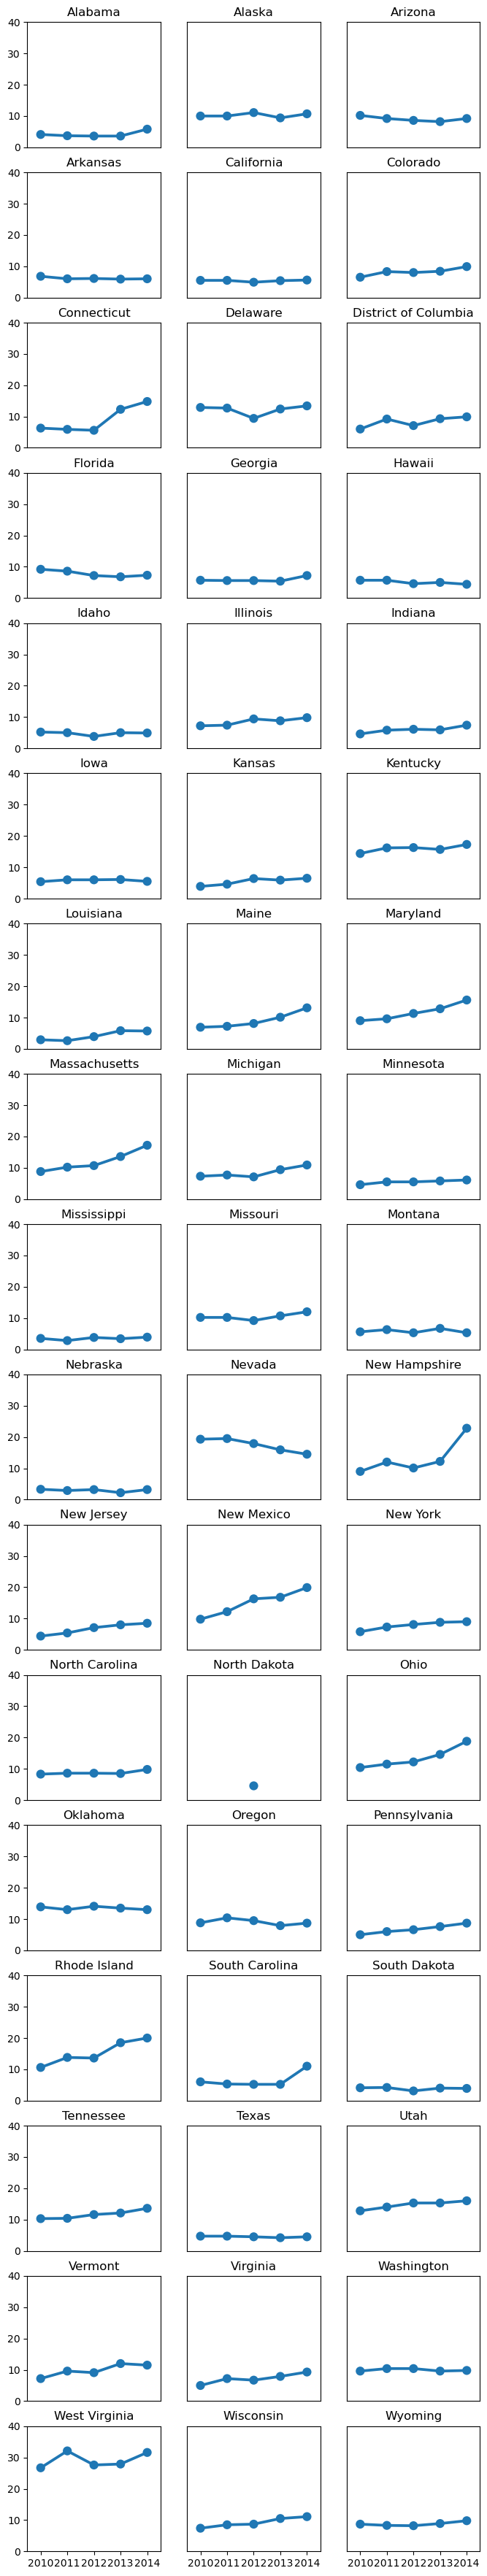

In [28]:
# plot change in crude rate of states with available data 2010-2014
fig, axs = plt.subplots(figsize=(8,45), nrows=17, ncols=3)

# create state name array and reshape it
state_name = gdp_opioid['State'].unique()
state_name = np.reshape(state_name, (-1, 3))

for col in range(3):
    for row in range(17):
        sns.pointplot(data = gdp_opioid[gdp_opioid['State']==state_name[row,col]], 
                      x='Year', y='Crude Rate', ax = axs[row,col])
        axs[row,col].set_title(state_name[row,col])
        
        # add y ticks for only the first column of plots
        if col != 0:
            axs[row,col].set_yticks([])
        
        # add x ticks for only the last row of plots
        if row != 16:
            axs[row,col].set_xticks([])
            
        axs[row,col].set_xlabel('')
        axs[row,col].set_ylabel('')
        axs[row,col].set_ylim(0,40)
plt.savefig('figures/Crude Rate')
plt.show()

From the visualization above, we can obviously see that some states have significant high crude rates compared to other states. Among those states with abnormal high rates, they have different changes in these 5 years. Some show an increasing trend, where as some display first decreasing and then increasing trend. The situation is quite complex to analyze as a whole. Therefore, we are going to compare states by states rather than finding a pattern among all of them. 

Our research question is: the association between crude rate and state gdp.

## Author Contributions 
Jenny:

Zac:
    
Irene:
    
Yi: